<a href="https://colab.research.google.com/github/Jessie-Willow/Generic-templates-for-lab-anal-JW/blob/main/Red_LED(JW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import some useful modules
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import scipy.stats as stats
import scipy.odr as odr
Rled=474
Rled_err=1
Rpd=1e6
Rpd_err=1e4
def ratio_error(a,a_err,b,b_err):
  val1=(a_err/b)**2
  val2=((a*b_err)/(b**2))**2
  return((val1+val2)**0.5)
#titles and labels your plots and residuals
ytitle="Photodiode current"
xtitle="LED current"
#data
VL=(2.788,3.081,3.292,3.558,3.847,4.368,5.019,6.109,7.453,9.404)
VL_err=(0.015,0.025,0.025,0.025,0.025,0.020,0.045,0.045,0.045,0.025)
VP=(0.982,1.116,1.206,1.295,1.375,1.598,1.837,2.239,2.746,3.443)
VP_err=(0.001,0.001,0.001,0.001,0.001,0.006,0.013,0.008,0.020,0.015)
#assigns your data to arrays, and makes them a little random for the perfect fake data.
#make sure to remove the numpy random code before using this for actual data!
VL=np.array(VL)
VP=np.array(VP)
VL_err=np.array(VL_err)
VP_err=np.array(VP_err)
x_err=ratio_error(VL,VL_err,Rled,Rled_err)
x=VL/Rled
y_err=ratio_error(VP,VP_err,Rpd,Rpd_err)
y=VP/Rpd

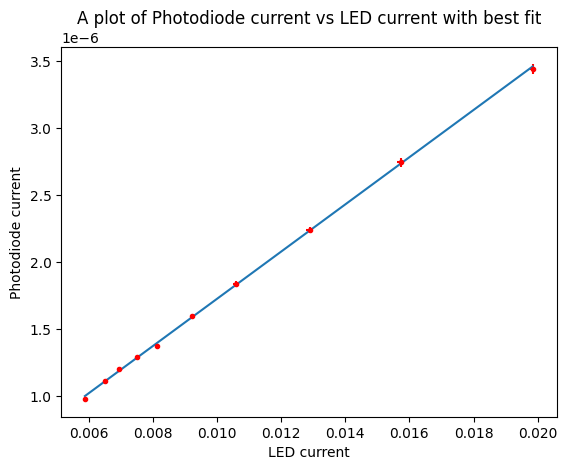

In [34]:
#defines a straight line function (used for residuals)
def straight_line(x, m, c):
    y = m * x + c
    return y


dof = len(x) - 2
#performs a versing of Deming regression (very complicated dont ask)
mydata = odr.Data(x, y, wd=1/x_err, we=1/y_err)
myodr = odr.ODR(mydata, model=odr.unilinear)
myoutput = myodr.run()
m,c = myoutput.beta
#assigns your fit paramaters to m,c and their errors.
y_fit = straight_line(x, m, c)
m_err,c_err=(myoutput.sd_beta)
#plotting!
plt.errorbar(x, y, yerr=y_err, xerr=x_err, fmt='r.')
plt.plot(x, y_fit, marker=None)
plt.ylabel(ytitle)
plt.xlabel(xtitle)
plt.title("A plot of "+ ytitle +" vs " +xtitle+ " with best fit")
plt.show()

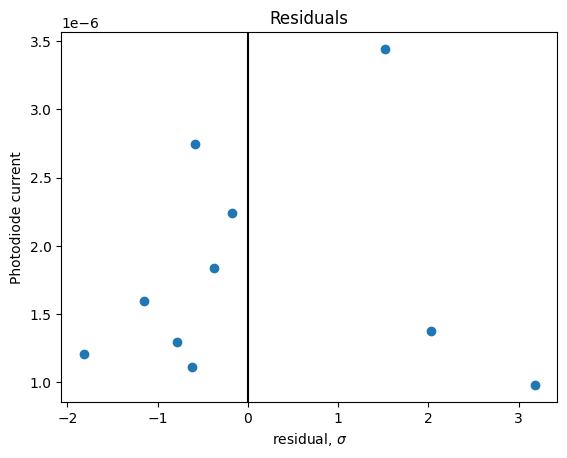

In [35]:
#defines the invserse linear funtion for the x residuals
def inversestr(y,m,c):
  return((y-c)/m)
x_fit = inversestr(y, m, c)
residuals = x - x_fit
chi_squarex = np.sum(residuals**2/x_err**2)
plt.scatter(residuals/x_err,y)
plt.axvline(x=0, color='black')
plt.ylabel(ytitle)
plt.xlabel('residual, $\sigma$')
plt.title('Residuals')
plt.show()

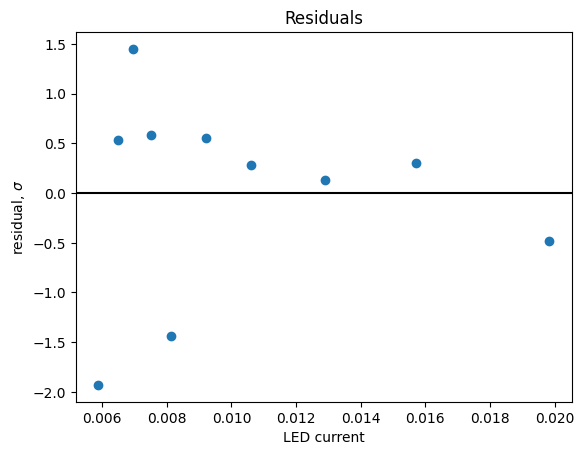

In [36]:
#uses the nroaml straight line for the y residuals
yfit=straight_line(x,m,c)
residuals = y - yfit
chi_squarey = np.sum(residuals**2/y_err**2)
plt.scatter(x, residuals/y_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel(xtitle)
plt.title('Residuals')
plt.show()

In [37]:
#prints the plot values and errors
print('The obtained value for the gradient m is:\n')
print(f'{m:.3} +/- {m_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c:.3} +/- {c_err:.2} units')
#prints the fit analysis including chi squared and p value
#chi sqaured is divided by two due to the errors on x and y being accounted for in the fit. this has been shown experimentall to produce the correct p values
print(f'The fit yielded \nchi2 = {chi_squarey:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_squarey/(dof):.3} for y')
print(f'giving a reduced chi2 of {chi_squarex/(dof):.3} for x')
chi2 = stats.chi2
p_valuey = chi2.sf(chi_squarey, dof)
p_valuex = chi2.sf(chi_squarex, dof)
print(f'P-value(y) = {p_valuey:.2}')
print(f'P-value(x) = {p_valuex:.2}')

The obtained value for the gradient m is:

0.000176 +/- 1.4e-06 units

The obtained value for the y-intercept c is:

-3.56e-08 +/- 1.3e-08 units
The fit yielded 
chi2 = 9.26 with 8 degrees of freedom
giving a reduced chi2 of 1.16 for y
giving a reduced chi2 of 2.84 for x
P-value(y) = 0.32
P-value(x) = 0.0038


In [38]:
alpha=0.016
alpha_err=0.001
print(f"the calculated total efficiency was {m/alpha}")
print(f"With error {ratio_error(m,m_err,alpha,alpha_err)}")

the calculated total efficiency was 0.011015481112042048
With error 0.0006941695434638141
